## Loading the SARS and MERS Sequences

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
from keras import *

In [4]:
mers = pd.read_csv('/content/drive/MyDrive/MersSequences.csv')
sars = pd.read_csv('/content/drive/MyDrive/SarsSequences.csv')

In [5]:
mers.head()

,AccessionID,Sequence
0,MK920308.1,ATGAGAGTTCAAAGACCACCCACTCTCTTGTTAGTGTTCTCACTCT...
1,MK910259.1,ATGATACACTCAGTGTTTCTACTGATGTTCTTGTTAACACCTACAG...
2,MN312749.1,TATGCCTAACATGTGTAGGATTTTCGCGTCTCTGATTTTGGCACGC...
3,MN312750.1,TATGCCTAACATGTGTAGGATTTTTGCATCTCTGATTTTGGCACGC...
4,MN312751.1,TATGCCTAACATGTGTAGGATTTTCGCGTCTCTGATTTTGGCACGC...


In [6]:
sars.head()

,AccessionID,Sequence
0,MW039449.1,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...
1,MW039533.1,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...
2,MW039576.1,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...
3,MW039602.1,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...
4,MW032265.1,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...


In [9]:
mseqnp = mers['Sequence'].to_numpy()
print("Total number of MERS sequences in the dataset : ",mseqnp.shape[0])

Total number of MERS sequences in the dataset :  804


In [10]:
sseqnp = sars['Sequence'].to_numpy()
print("Total number of SARS sequences in the dataset : ",sseqnp.shape[0])

Total number of SARS sequences in the dataset :  1691


## Creating k-mers 

In [11]:
def pre_process(seq):
    seq_out = seq.strip("'")
    seq_out = seq_out.strip()
    return seq_out

In [12]:
def creating_kmers(k,seq):
    tot = len(seq)
    l= 0
    kmers = np.array([])
    while (l < tot-k):
        kmers = np.append(kmers,seq[l:l+k])
        l =l+k+1
    return kmers

In [14]:
Mk40mers = np.array([])
for seq in mseqnp:
    Mk40mers = np.append(Mk40mers,creating_kmers(40,seq))
print("Total number of MERS 40-mers : ", Mk40mers.shape[0])

Total number of MERS 40-mers :  38362


In [16]:
Sk40mers = np.array([])
for seq in sseqnp:
    Sk40mers = np.append(Sk40mers,creating_kmers(40,seq))
print("Total number of SARS 40-mers : ", Sk40mers.shape[0])

Total number of SARS 40-mers :  45930


In [17]:
mers_tokenized = list(list(creating_kmers(40,seq) for seq in mseqnp))
len(mers_tokenized)

804

In [18]:
sars_tokenized = list(list(creating_kmers(40,seq) for seq in sseqnp))
len(sars_tokenized)

1691

In [19]:
for idx,m in enumerate(mers_tokenized):
  mers_tokenized[idx] = mers_tokenized[idx].tolist()

In [20]:
for idx,m in enumerate(sars_tokenized):
  sars_tokenized[idx] = sars_tokenized[idx].tolist()

## Frequency Distribution of the k-mers

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
Mfdist = nltk.FreqDist(Mk40mers)
Sfdist = nltk.FreqDist(Sk40mers)

## Deriving the top frequency k-mers as tokens

In [23]:
Mtokens = sorted(Mfdist, reverse=True)[:100]

In [24]:
print("We have a list of top ",len(Mtokens)," frequency tokens for MERS")

We have a list of top  100  frequency tokens for MERS


In [25]:
Stokens = sorted(Sfdist, reverse=True)[:100]
print("We have a list of top ",len(Stokens)," frequency tokens for SARS")

We have a list of top  100  frequency tokens for SARS


# Embedding Dimension : 100

## Embeddings for 30-mers of SARS and MERS

In [26]:
from gensim.models import FastText

model_mers = FastText(window=3, min_count=1)  
model_mers.build_vocab(sentences=mers_tokenized)
model_mers.train(sentences=mers_tokenized, total_examples=len(mers_tokenized), epochs=20) 

In [27]:
model_sars = FastText(window=3, min_count=1)  
model_sars.build_vocab(sentences=sars_tokenized)
model_sars.train(sentences=sars_tokenized, total_examples=len(sars_tokenized), epochs=20) 

## t-SNE plot for 30-mers of MERS and SARS

In [28]:
mers_embed = np.zeros((len(Mtokens),100))
for i in range(len(Mtokens)):
  mers_embed[i] = model_mers.wv[Mtokens[i]]

In [29]:
sars_embed = np.zeros((len(Stokens),100)) 
for i in range(len(Stokens)):
  sars_embed[i] = model_sars.wv[Stokens[i]]

In [30]:
mers_embed.shape

(100, 100)

In [31]:
sars_embed.shape

(100, 100)

In [32]:
from sklearn.manifold import TSNE
import matplotlib.patheffects as pe
import seaborn as sb

#Implementing the TSNE Function
Mtsne = TSNE(perplexity=30).fit_transform(mers_embed)
Stsne = TSNE(perplexity=30).fit_transform(sars_embed) 

In [33]:
X_2d=[Mtsne,Stsne]

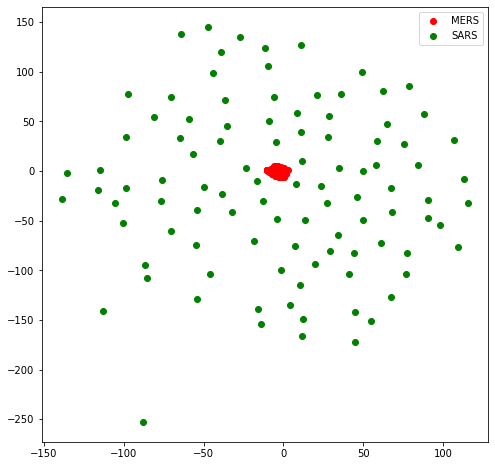

In [34]:
l = ['MERS', 'SARS']
plt.figure(figsize=(8, 8))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip([0,1], colors, l):
  plt.scatter(X_2d[i][:,0], X_2d[i][:,1], c=c, label=label)
plt.legend()
plt.show()

In [35]:
def hamming_distance(A,B):
  score=0
  for i in range(0,len(A)):
    if(A[i]==B[i]):
      score+=1
  return score      

In [36]:
def cosine_similarity(vec1,vec2):                                          
  return np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))

In [37]:
def eucleidan_dist(vec1,vec2):                                           
  return np.linalg.norm(vec1-vec2)

In [38]:
def longestSubstringFinder(string1, string2):
    answer = ""
    len1, len2 = len(string1), len(string2)
    for i in range(len1):
        match = ""
        for j in range(len2):
            if (i + j < len1 and string1[i + j] == string2[j]):
                match += string2[j]
            else:
                if (len(match) > len(answer)): answer = match
                match = ""
    return answer

Hamming Distance as metric

In [39]:
y_train=[]
for i in range(0,len(Mtokens)):
  y_train.append(hamming_distance(Mtokens[i],Stokens[i]))  
Y_train_1=np.array(y_train) 

Euclidean distance as metric

In [40]:
y_train=[]
for i in range(0,len(Mtsne)):  
  y_train.append(eucleidan_dist(Mtsne[i],Stsne[i]))  
Y_train_2=np.array(y_train)

Cosine similiarity as metric

In [41]:
y_train=[]
for i in range(0,len(Mtsne)):  
  y_train.append(cosine_similarity(Mtsne[i],Stsne[i]))  
Y_train_3=np.array(y_train)  

In [42]:
Y_train_1=np.reshape(Y_train_1,(100,1))
Y_train_2=np.reshape(Y_train_2,(100,1))
Y_train_3=np.reshape(Y_train_3,(100,1))

Word embedding of the common substring

In [43]:
subseq=[]
for i in range(len(Mtokens)):
  subseq.append(longestSubstringFinder(Mtokens[i],Stokens[i]))
subseq_embed = np.zeros((len(subseq),100))
for i in range(len(subseq)):
 subseq_embed[i] = model_mers.wv[subseq[i]]
SSeqtsne = TSNE(perplexity=30).fit_transform(subseq_embed)

**Functional API's**

In [45]:
# hamming distance
input1 = Input(shape=(2, ))
input2 = Input(shape=(2, ))
merged = Concatenate(axis=1)([input1, input2])
dense1 = Dense(4,activation='relu', use_bias=True)(merged)
dense2 = Dense(4,activation='relu', use_bias=True)(dense1)
dense3 = Dense(3,activation='relu', use_bias=True)(dense2)
dense4 = Dense(2,activation='relu', use_bias=True)(dense3)
output = Dense(1,activation='relu', use_bias=True)(dense4)  
model_1= Model(inputs=[input1, input2], outputs=output)

TypeError: ignored

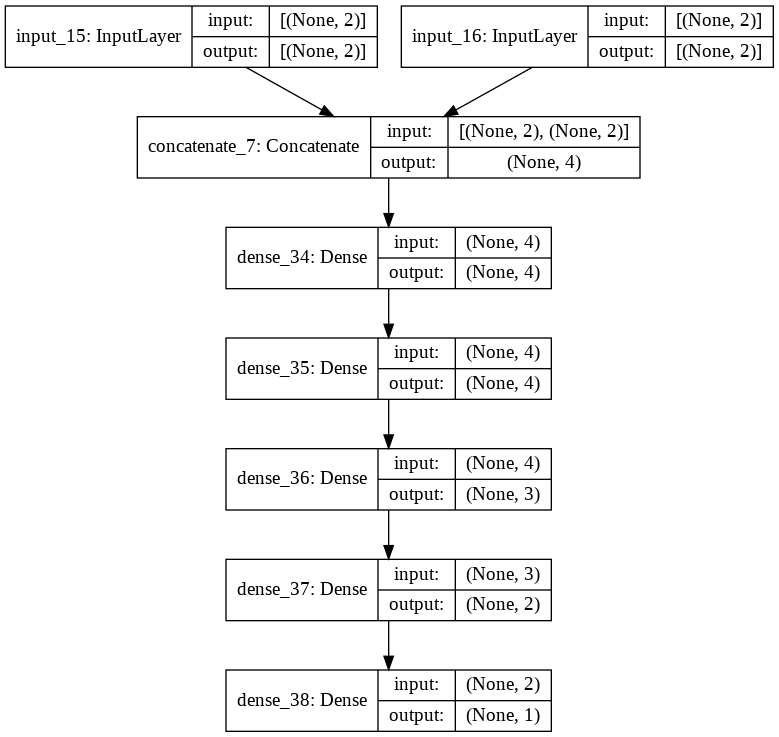

In [ ]:
utils.plot_model(model_1, "MLP.png",show_shapes=True)

In [ ]:
model_1.compile(loss='mean_squared_error', optimizer='adam')
model_1.fit([Mtsne,Stsne],Y_train_1,epochs=500);

Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 196.1637
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 199.1595
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 200.0876
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 200.0907
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 194.5876
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 193.3262
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 199.8189
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 194.5251
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 194.5595
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 192.4793
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 196.4178
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 197.3501
Epoch 13/500
4/4 [===================

In [46]:
# euclidean distance
input1 = Input(shape=(2, ))
input2 = Input(shape=(2, ))
merged = Concatenate(axis=1)([input1, input2])
dense1 = Dense(4,activation='relu', use_bias=True)(merged)
dense2 = Dense(4,activation='relu', use_bias=True)(dense1)
dense3 = Dense(3,activation='relu', use_bias=True)(dense2)
dense4 = Dense(2,activation='relu', use_bias=True)(dense3)
output = Dense(1,activation='relu', use_bias=True)(dense4)  
model_2= Model(inputs=[input1, input2], outputs=output)

TypeError: ignored

In [ ]:
model_2.compile(loss='mean_squared_error', optimizer='adam')
model_2.fit([Mtsne,Stsne],Y_train_2,epochs=500);

Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 63.4918
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 60.6341
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 62.9793
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 62.6940
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 62.9100
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 59.8853
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 63.4813
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 57.1468
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 59.6470
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 60.9231
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 67.4717
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 60.8091
Epoch 13/500
4/4 [==============================]

In [ ]:
# cosine similarity
input1 = Input(shape=(2, ))
input2 = Input(shape=(2, ))
merged = Concatenate(axis=1)([input1, input2])
dense1 = Dense(4,activation='relu', use_bias=True)(merged)
dense2 = Dense(4,activation='relu', use_bias=True)(dense1)
dense3 = Dense(3,activation='relu', use_bias=True)(dense2)
dense4 = Dense(2,activation='relu', use_bias=True)(dense3)
output = Dense(1,activation='tanh', use_bias=True)(dense4)  
model_3= Model(inputs=[input1, input2], outputs=output)

In [ ]:
model_3.compile(loss='mean_squared_error', optimizer='adam')
model_3.fit([Mtsne,Stsne],Y_train_3,epochs=500);

Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 0.7531
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6944
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.7111
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6331
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6512
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6535
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6302
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6072
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5697
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5731
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5971
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5246
Epoch 13/500
4/4 [==============================] - 0s 3ms/st

**WordtoVec of Longest Common Substring as metric** 

In [ ]:
input1 = Input(shape=(2,))
input2 = Input(shape=(2,))
merged = Concatenate(axis=1)([input1, input2])
dense1 = Dense(4,activation='relu', use_bias=True)(merged)
dense2 = Dense(4,activation='relu', use_bias=True)(dense1)
dense3 = Dense(3,activation='relu', use_bias=True)(dense2)
output = Dense(2,activation='tanh', use_bias=True)(dense3)
model_4= Model(inputs=[input1, input2], outputs=output)

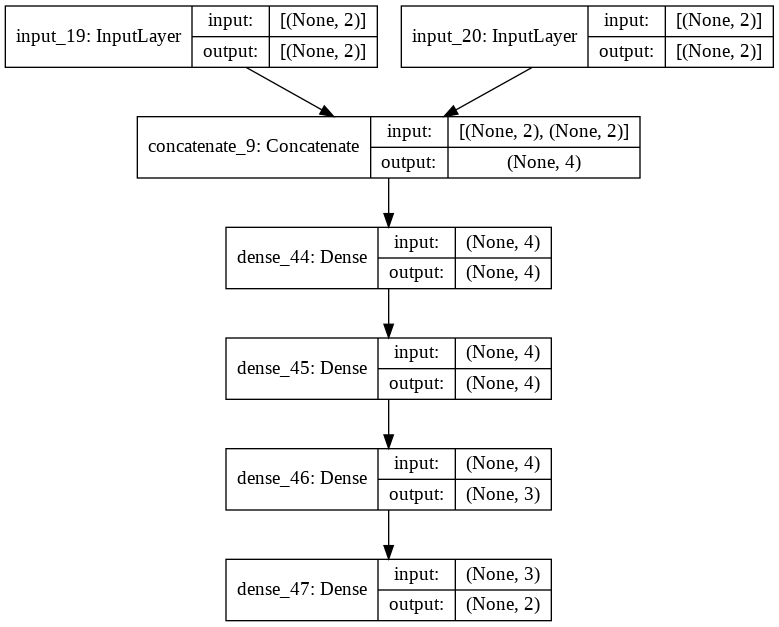

In [ ]:
utils.plot_model(model_4, "MLP.png",show_shapes=True)

In [ ]:
model_4.compile(loss='mean_squared_error', optimizer='adam')
model_4.fit([Mtsne,Stsne],SSeqtsne,epochs=500);

Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 21.3971
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 21.1153
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 20.3322
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 21.4756
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 19.8858
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 20.5008
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 19.0932
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 20.1743
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 21.5422
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 20.6740
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 21.0921
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 21.0854
Epoch 13/500
4/4 [==============================]

In [ ]:
model_3.get_weights()[6] 

array([[ 0.3173524 , -0.96803194],
       [-1.2514029 ,  1.3108076 ],
       [ 0.97955656,  1.0251967 ]], dtype=float32)

## Sequence Alignment using Encoding

In [ ]:
def Encoder(s):
    a=np.zeros(len(s))
    for i in range(len(s)):
        if(s[i]=="A"):
            a[i]=1
        elif(s[i]=="T"):
            a[i]=2
        elif(s[i]=="G"):
            a[i]=3
        elif(s[i]=="C"):
            a[i]=4
        elif(s[i]=="-"):
            a[i]=5      
    return a

In [ ]:
def longestSubstringFinder(string1, string2):
    answer = ""
    len1, len2 = len(string1), len(string2)
    if(len1==len2): 
     for i in range(len1):
        match = ""
        for j in range(len2):
            if (i + j < len1 and string1[i + j] == string2[j]):
                match += string2[j]
            else:
                if (len(match) > len(answer)): answer = match
                match = ""
    if(len(answer)<len1):
      for i in range(len(answer),len1):
        answer+="-"
    return answer

In [ ]:
x1=[]
x2=[]
x3=[]
for i in range(len(Mtokens)):
    x1.append(Encoder(Mtokens[i]))
    x2.append(Encoder(Stokens[i]))
    x3.append(Encoder(longestSubstringFinder(Mtokens[i],Stokens[i])))

In [ ]:
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)

In [ ]:
X1_train=x1[0:90]
X1_test=x1[90:]
X2_train=x2[0:90]
X2_test=x2[90:]
X3_train=x3[0:90]
X3_test=x3[90:]

In [47]:
input1 = Input(shape=(40, ))
input2 = Input(shape=(40, ))
merged = Concatenate(axis=1)([input1, input2])
dense1 = Dense(128,activation='relu', use_bias=True)(merged)
dense2 = Dense(64,activation='relu', use_bias=True)(dense1)
output = Dense(40,activation='relu', use_bias=True)(dense2)  
model= Model(inputs=[input1, input2], outputs=output)

TypeError: ignored

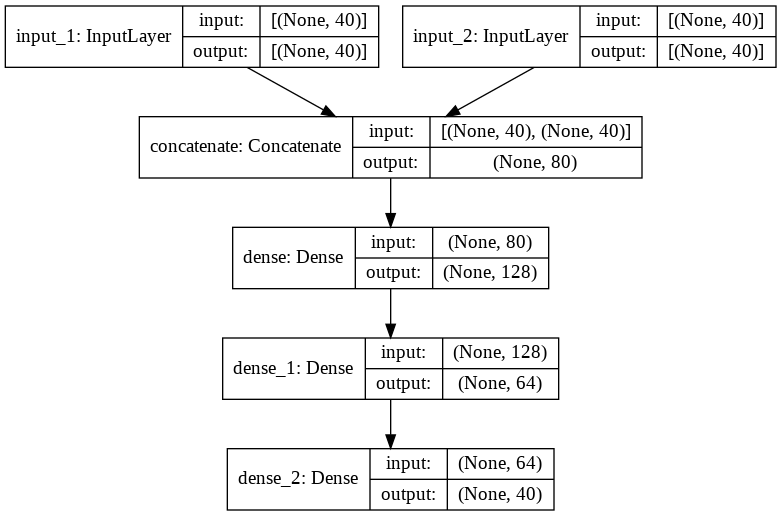

In [ ]:
utils.plot_model(model, "MLP.png",show_shapes=True)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 80)           0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          10368       concatenate[0][0]            

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit([X1_train,X2_train],X3_train,epochs=100);

Epoch 1/100
3/3 [==============================] - 3s 6ms/step - loss: 17.7329
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 14.3398
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 11.5706
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 10.4796
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 9.9195
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 9.0255
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 8.2457
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 7.5610
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 7.0566
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 6.7627
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 6.5862
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 6.4814
Epoch 13/100
3/3 [==============================] - 0s 5m

In [ ]:
def Decoder(s):
    a=""
    for i in range(len(s)):
        if(s[i]==1):
            a+="A"
        elif(s[i]==2):
            a+="T"
        elif(s[i]==3):
            a+="G"
        elif(s[i]==4):
            a+="C"
        elif(s[i]==5):
            break      
    return a

In [ ]:
pred=model.predict([X1_test,X2_test]).round()

In [ ]:
lo=[]
lp=[]
for i in range(len(pred)):
    lo.append(Decoder(X3_test[i]))
    lp.append(Decoder(pred[i]))
print(lo)
print(lp)

['TTT', 'TTTGT', 'TTTGT', 'TTTGT', 'TTTGT', 'ACTAGT', 'TTTGT', 'TTTGT', 'AAACAGT', 'TTAAGA']
['TTTC', 'TTTC', 'TTGG', 'TTTGC', 'TTG', 'TTC', 'ATGC', 'TTTC', 'TTTGC', 'TTTTC']
